In [1]:
import random
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (22, 8)
val_size = 0.2
random.seed = 42

In [2]:
data_path = Path("../datasets/fruits-360_dataset/fruits-360")
train_path = data_path / "Training"
test_path = data_path / "Test"
val_path = data_path / "val"

(train_path.parent / "train").mkdir(exist_ok=True)
(test_path.parent / "test").mkdir(exist_ok=True)
val_path.mkdir(exist_ok=True)

if not len(list((train_path.parent / "train").iterdir())):
    train_path.rename(train_path.parent / "train")
    test_path.rename(test_path.parent / "test")

train_path = data_path / "train"
test_path = data_path / "test"

In [3]:
labels = [label.name for label in sorted(train_path.iterdir())]
labels_cnt_train = [len(list(label.iterdir())) for label in sorted(train_path.iterdir())]
labels_cnt_test = [len(list(label.iterdir())) for label in sorted(test_path.iterdir())]

<BarContainer object of 131 artists>

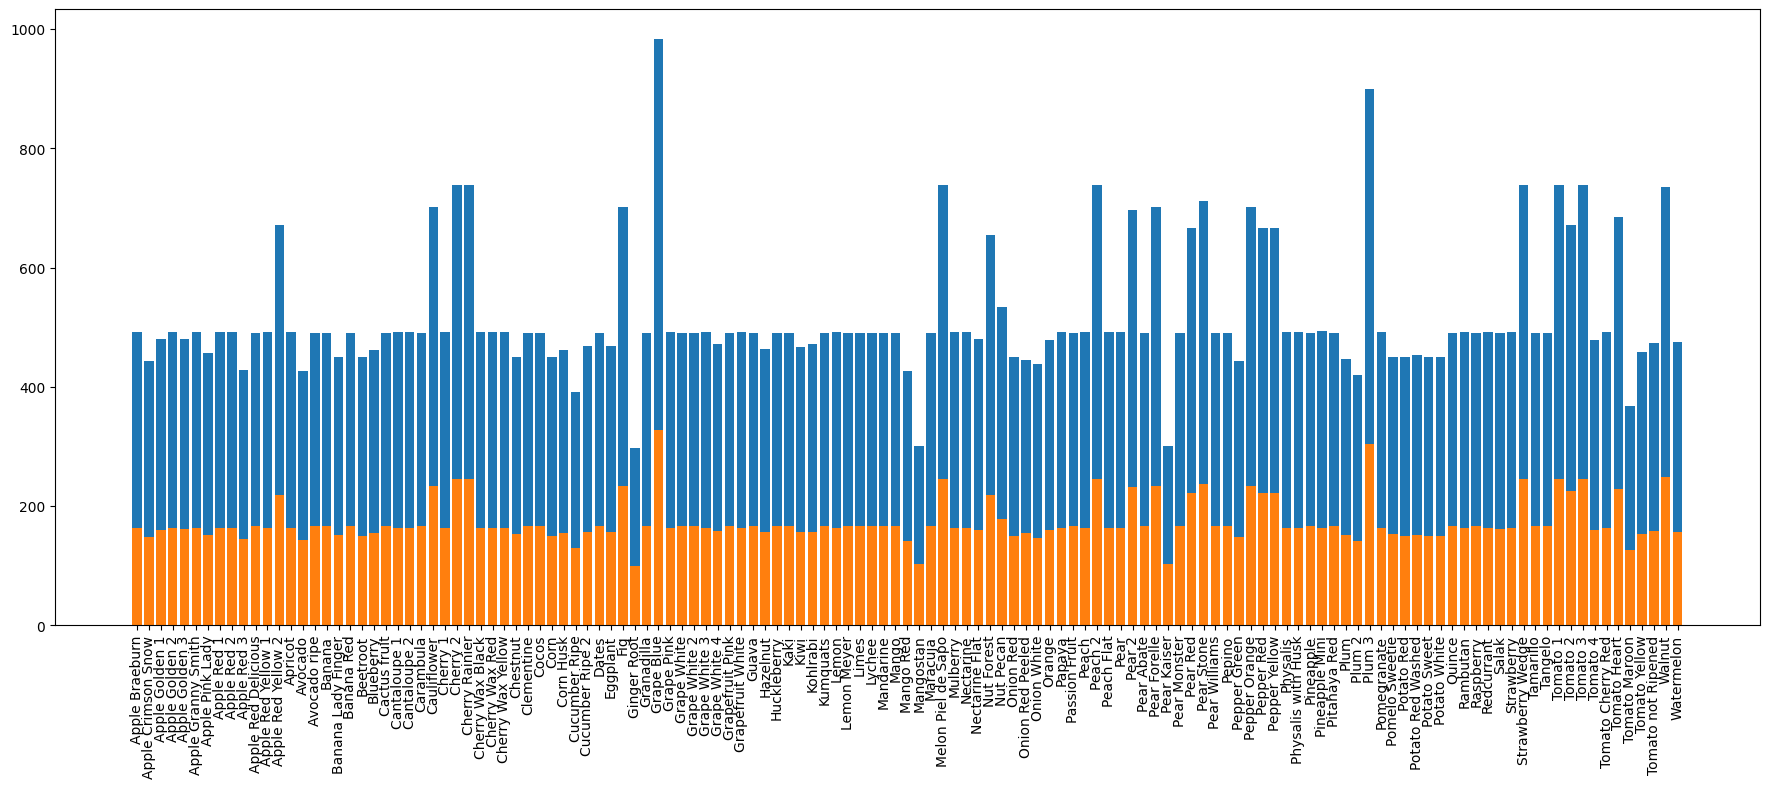

In [4]:
plt.xticks(rotation='vertical')
plt.bar(labels, labels_cnt_train)
plt.bar(labels, labels_cnt_test)

In [5]:
for label in tqdm(list(train_path.iterdir())):
    img_paths = list(label.iterdir())
    random.shuffle(img_paths)
    train_imgs = img_paths[:-int(len(img_paths) * val_size)]
    val_imgs = img_paths[-int(len(img_paths) * val_size):]
    
    (val_path / label.name).mkdir(exist_ok=True)
    for img_p in val_imgs:
        img_p.rename(val_path / label.name / img_p.name)

100%|██████████| 131/131 [00:00<00:00, 279.85it/s]
